<a href="https://colab.research.google.com/github/snehaabr/datasciencecoursera/blob/master/Copy_of_CV_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                    # Importing cv2_imshow from google.patches to display images


In [ ]:
# Display images using OpenCV
from google.colab.patches import cv2_imshow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.0


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

homeFldr = '/content/drive/MyDrive/Colab Notebooks/04_ComputerVsn/'

# Code to read the data
currFldr = 'Plants_Classification/'
fileFldr = homeFldr + currFldr
print(fileFldr)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/04_ComputerVsn/Plants_Classification/


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/04_ComputerVsn/Proj_Plants_Classification/plants_images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/04_ComputerVsn/Proj_Plants_Classification/plant_labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


## Plotting images using OpenCV and matplotlib

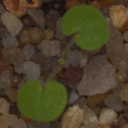

In [ ]:
cv2_imshow(images[5])

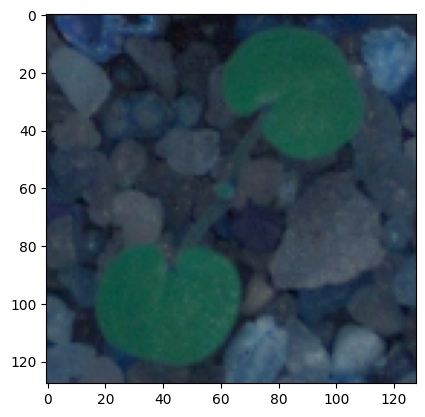

In [ ]:
plt.imshow(images[5])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

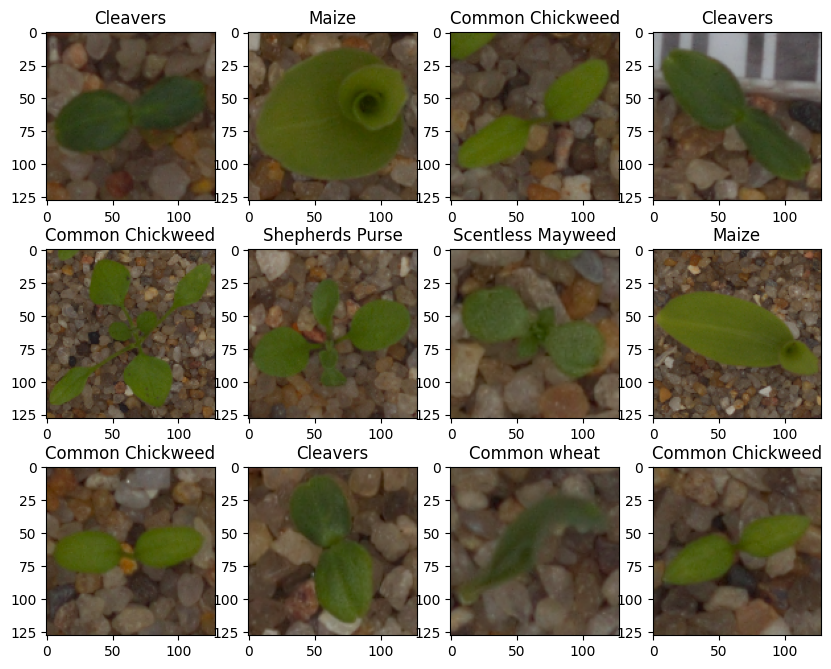

In [ ]:
plot_images(images,labels)

The grid of images shows a variety of plants, each with distinct characteristics that can be used for classification like
1. leaf shape and Size
2. Leaf arragement and stem
3. Color
4. Background etc..

These features are crucial for training image classification models as they provide the visual cues needed to distinguish between the different plant types.

<b> Checking for data imbalance

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

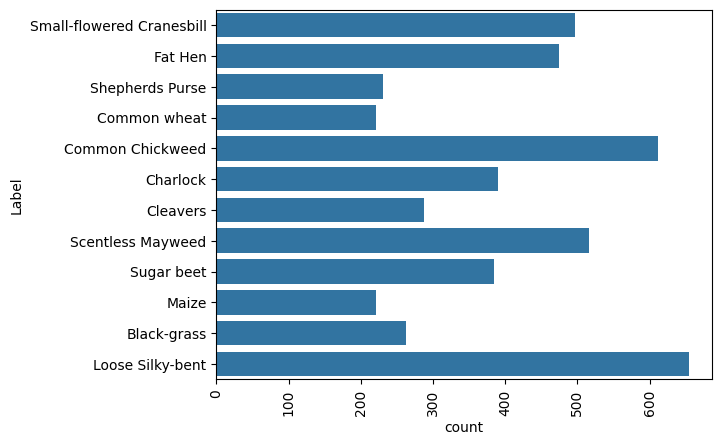

In [ ]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

The bar plot indicates presence of class imbalance.

* Highly Represented Classes: Some classes like "Loose Silky-bent" and "Common Chickweed" have a much higher number of samples compared to others.
* Underrepresented Classes: Classes like "Small-flowered Cranesbill" / Maize/ common Wheat have significantly fewer samples.

This imbalance can lead to:

* Model Bias: The model might become biased towards predicting the classes with more samples because it has "seen" more examples of these classes during training.
* Poor Generalization: Underrepresented classes might not be predicted accurately as the model hasn't learned their features well enough.

### We will modify loss function at a later point to address the class imbalance

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

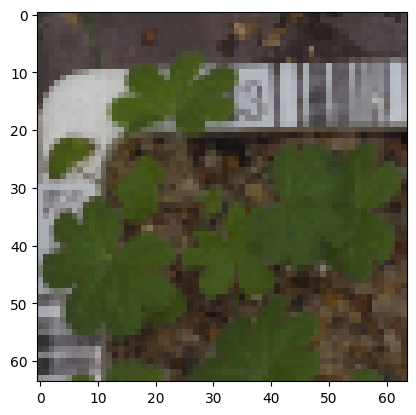

In [ ]:
plt.imshow(images_decreased[3])

## Visualizing images using Gaussian Blur

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


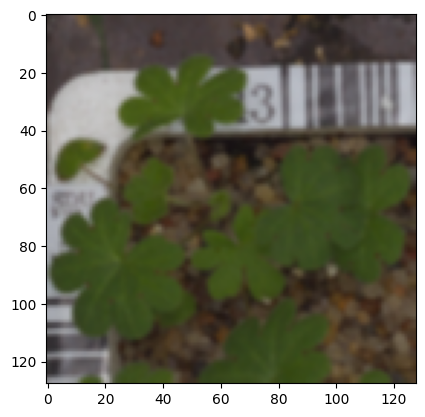

In [ ]:
plt.imshow(images_gb[3])

## **Splitting the dataset**

- As we have less images in our dataset, we will only use 20% of our data for testing. Then, splitting the remaining 80% into training and validation with test_size=0.25 results in 60% training and 20% validation of the original data.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
from sklearn.model_selection import train_test_split

# First, split into train+validation and test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels)

# Now split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(2850, 128, 128, 3) (2850, 1)
(950, 128, 128, 3) (950, 1)
(950, 128, 128, 3) (950, 1)


## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values

## Encoding the target labels

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

## My Analysis ==================== START =================

**Step 1: Define the Model Architecture**
We'll start with a simple CNN architecture that can be expanded or modified based on performance needs and computational constraints.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initialize the model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening the layers
model.add(Flatten())

# Dense Layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(12, activation='softmax'))  # Assuming 12 classes based on your dataset

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,947,916 (49.39 MB)

 Trainable params: 12,946,444 (49.39 MB)

 Non-trainable params: 1,472 (5.75 KB)

**Step 2: Compile the Model**
For the compilation, consider using a weighted loss function if dealing with class imbalance as previously discussed.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
    metrics=['accuracy']
)


**Step 3: Handling Data Imbalance**
To handle data imbalance, use the class_weight parameter in the fit method to give more importance to underrepresented classes.

In [ ]:
from sklearn.utils import class_weight
# Calculate class weights using one-hot encoded labels
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),  # Calculate from one-hot labels
    y=np.argmax(y_train, axis=1)  # Convert one-hot to class indices for weight calculation
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Fit the model using the processed and encoded data
history = model.fit(
    X_train_normalized,  # Use normalized images for training
    y_train_encoded,     # Use one-hot encoded labels for training
    epochs=30,
    batch_size=32,
    validation_data=(X_val_normalized, y_val_encoded),  # Use normalized and encoded validation data
    class_weight=class_weights_dict,  # Apply class weights for imbalance
    verbose=2
)


Epoch 1/30
90/90 - 16s - 177ms/step - accuracy: 0.4642 - loss: 1.8453 - val_accuracy: 0.1084 - val_loss: 20.0784
Epoch 2/30
90/90 - 1s - 7ms/step - accuracy: 0.6796 - loss: 0.9873 - val_accuracy: 0.1200 - val_loss: 24.0725
Epoch 3/30
90/90 - 1s - 7ms/step - accuracy: 0.6986 - loss: 0.9163 - val_accuracy: 0.0463 - val_loss: 9.1648
Epoch 4/30
90/90 - 1s - 7ms/step - accuracy: 0.7989 - loss: 0.6165 - val_accuracy: 0.1337 - val_loss: 10.5152
Epoch 5/30
90/90 - 1s - 7ms/step - accuracy: 0.8544 - loss: 0.4396 - val_accuracy: 0.1674 - val_loss: 6.5105
Epoch 6/30
90/90 - 1s - 7ms/step - accuracy: 0.8056 - loss: 0.5848 - val_accuracy: 0.4032 - val_loss: 2.7122
Epoch 7/30
90/90 - 1s - 7ms/step - accuracy: 0.8874 - loss: 0.3253 - val_accuracy: 0.4284 - val_loss: 5.8270
Epoch 8/30
90/90 - 1s - 7ms/step - accuracy: 0.8354 - loss: 0.4833 - val_accuracy: 0.5547 - val_loss: 2.6970
Epoch 9/30
90/90 - 1s - 7ms/step - accuracy: 0.9056 - loss: 0.2869 - val_accuracy: 0.7389 - val_loss: 1.0926
Epoch 10/30
9

**Step 4: Model Evaluation**
Ensure the evaluation uses the processed data:

In [ ]:
# Evaluate the model on the normalized and one-hot encoded test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7503 - loss: 1.2254
Test Loss: 1.125083565711975
Test Accuracy: 0.7684210538864136


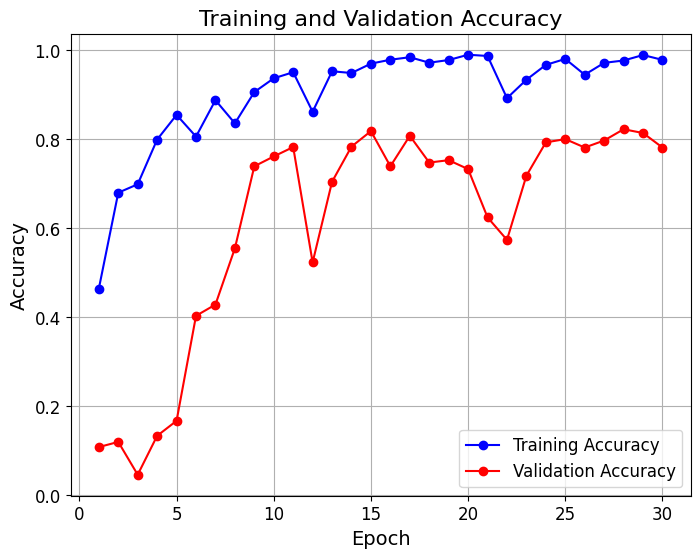

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Create the plot
plt.figure(figsize=(8, 6))  # Larger figure size for better readability
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')  # Blue solid line with circle markers
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')  # Red solid line with circle markers

# Adding titles and labels
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)  # Larger font size for ticks
plt.yticks(fontsize=12)
plt.grid(True)  # Adding a grid for better readability of the plot
plt.legend(loc='lower right', fontsize=12)  # Legend with larger font and adjusted location

# Display the plot
plt.show()


## Model Evaluation Output

**Test Loss: 2.15:** This is the average loss over all batches of the test set. It's slightly different from the loss reported during the last step of evaluation because it's an aggregate measure over the entire dataset. A lower test loss generally indicates a better performing model, though it is context-dependent.

**Test Accuracy: 0.611:** This is the average accuracy across all batches of the test set. It means that the model correctly predicted the label of the input data approximately 61.16% of the time.

## Training and Validation Accuracy Plot
The plot shows the training and validation accuracy values over 30 epochs, which reveals several key points about the model's training process:

**Training Accuracy:**

* The training accuracy starts relatively low but quickly increases, reaching close to 100%.
* This suggests that the model is effectively learning from the training data, fitting closely to the patterns it observes.

**Validation Accuracy:**

* The validation accuracy shows a different pattern. It starts lower, increases, but then exhibits significant volatility and generally remains much lower than the training accuracy.
* The peaks and drops indicate that the model’s performance on the validation set is inconsistent, which could be a sign of overfitting to the training data or that the model is sensitive to the specific makeup of the validation data in each epoch.

**Observations:**


*   We can see from the above plot that **the training accuracy of the  model was good but the validation accuracy was not good.**
*   The model seems to overfit on the data.

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


### **Evaluating the model on test data**

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

30/30 - 0s - 6ms/step - accuracy: 0.7684 - loss: 1.1251
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7503 - loss: 1.2254
Test Loss: 1.125083565711975
Test Accuracy: 0.7684210538864136


### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [ ]:
y_pred

array([[4.36183427e-08, 1.39148542e-04, 1.66445466e-06, ...,
        6.54758001e-03, 4.89249919e-03, 4.45874837e-10],
       [3.16803780e-05, 2.20320690e-02, 3.15291196e-04, ...,
        3.22340399e-01, 4.32306468e-01, 4.74537001e-06],
       [1.01162586e-03, 1.30239532e-05, 3.72018258e-06, ...,
        6.32101856e-03, 6.23204513e-04, 1.06212883e-05],
       ...,
       [1.87394164e-06, 1.08868604e-04, 8.90642298e-07, ...,
        1.42430712e-04, 1.67636586e-06, 2.59925553e-04],
       [1.29797484e-03, 1.50755068e-05, 1.34706454e-07, ...,
        1.04112010e-02, 9.41312101e-05, 2.27548717e-05],
       [2.29209982e-05, 3.89736488e-05, 5.99073147e-08, ...,
        7.85496552e-03, 3.15601824e-06, 1.04525621e-04]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

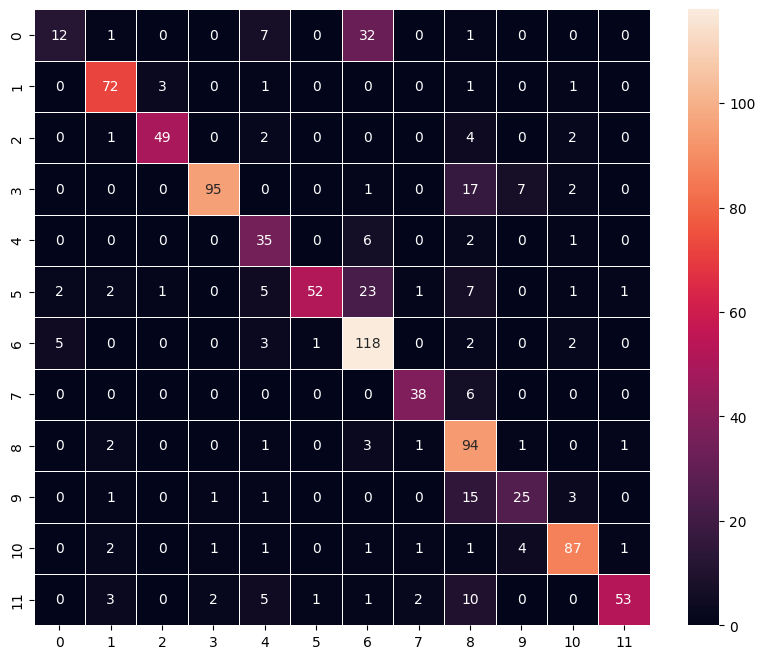

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Key Observations**

**Accuracy for Some Classes: Some classes like 1, 2, and 5 seem to have high accuracy** as the diagonal values are high compared to the off-diagonal values in their respective rows.

**Common Misclassifications:** There are classes that are often confused with one another:
Class 0 and 10 show a significant number of confusions.
Class 6 and 9 also seem to have notable misclassification rates with other classes.

**Well-classified Classes:** Classes like 2, 3, and 5 are predominantly well-classified, with high counts on the diagonal and relatively lower counts off-diagonal.

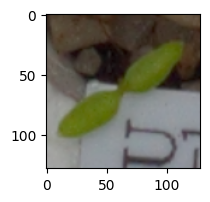

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
Predicted Label ['Scentless Mayweed']
True Label Common Chickweed


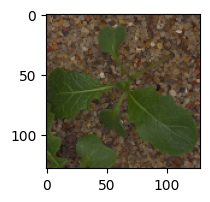

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Label ['Charlock']
True Label Charlock


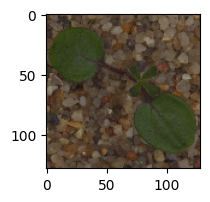

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label ['Cleavers']
True Label Cleavers


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[36])

# Model-2

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

**Step 1: Set Up Data Augmentation**
You can use Keras's ImageDataGenerator to implement data augmentation, which will apply transformations like rotations, shifts, flips, and zooms to your training data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Note: Only apply data augmentation to the training data
train_generator = train_datagen.flow(
    X_train_normalized,
    y_train_encoded,
    batch_size=32
)

# For validation data, only normalization is applied, no augmentation
validation_datagen = ImageDataGenerator()  # No augmentation parameters

validation_generator = validation_datagen.flow(
    X_val_normalized,
    y_val_encoded,
    batch_size=32
)


**Step 2: Update Your Model with Batch Normalization**
You can modify your CNN model by adding batch normalization layers. Batch normalization should be added after convolutional layers and before activation layers.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

# Initialize the updated model
model_2 = Sequential()

# Add convolutional, batch normalization, and pooling layers
model_2.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# Continue building the model as needed
# Ensure to add BatchNormalization after each Convolution layer and before activation



In [ ]:
from tensorflow.keras.layers import Flatten

# Add a Flatten layer before your output layer
model_2.add(Flatten())

In [ ]:
model_2.add(Dense(12, activation='softmax'))




In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break  # Only look at the first batch


data batch shape: (32, 128, 128, 3)
labels batch shape: (32, 12)


**Step 3: Compile the Model**

In [ ]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │       1,524,108 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,525,132 (5.82 MB)

 Trainable params: 1,525,068 (5.82 MB)

 Non-trainable params: 64 (256.00 B)

**Step 4: Train the Model with Augmented Data**
Now, train the model using the data generators. Using generators can help with memory efficiency and model performance:

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Assuming y_train_encoded are your labels and are one-hot encoded
class_labels = np.argmax(y_train_encoded, axis=1)  # Convert one-hot to integer class labels if needed
weights = class_weight.compute_class_weight('balanced',
                                            classes=np.unique(class_labels),
                                            y=class_labels)
class_weights = dict(enumerate(weights))


In [ ]:
# Set training parameters
epochs = 25
batch_size = 64

# Prepare the data generator for training
train_generator = train_datagen.flow(
    X_train_normalized,
    y_train_encoded,
    batch_size=batch_size,
    seed=42,
    shuffle=True  # It's often a good practice to shuffle the training data
)

# Model fitting with class weights
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch=len(X_train_normalized) // batch_size,
    epochs=epochs,
    validation_data=(X_val_normalized, y_val_encoded),
    class_weight=class_weights,  # Apply calculated class weights
    verbose=1
)


Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - accuracy: 0.1196 - loss: 33.5663 - val_accuracy: 0.1968 - val_loss: 2.3270
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3594 - loss: 5.6792 - val_accuracy: 0.2011 - val_loss: 2.3268
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.2887 - loss: 4.7779 - val_accuracy: 0.1600 - val_loss: 2.3504
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2969 - loss: 2.9684 - val_accuracy: 0.1737 - val_loss: 2.3682
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.3185 - loss: 2.9257 - val_accuracy: 0.2253 - val_loss: 2.3830
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2500 - loss: 2.7260 - val_accuracy: 0.2221 - val_loss: 2.3708
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.3552 - loss: 2.6553 - val_accuracy: 0.1526 - val_loss: 2.4010
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1875 - loss: 2.8437 - val_accuracy: 0.146

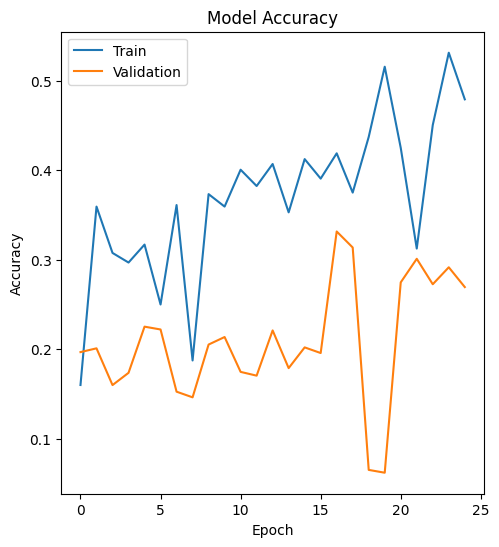

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_2.evaluate(X_test_normalized, y_test_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2840 - loss: 2.3561
Test Loss: 2.3678808212280273
Test Accuracy: 0.2789473831653595


We can observe that our accuracy has improved compared to our previous model.

In [ ]:
# Here we would get the output as probablities for each category
y_pred_2=model_2.predict(X_test_normalized)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


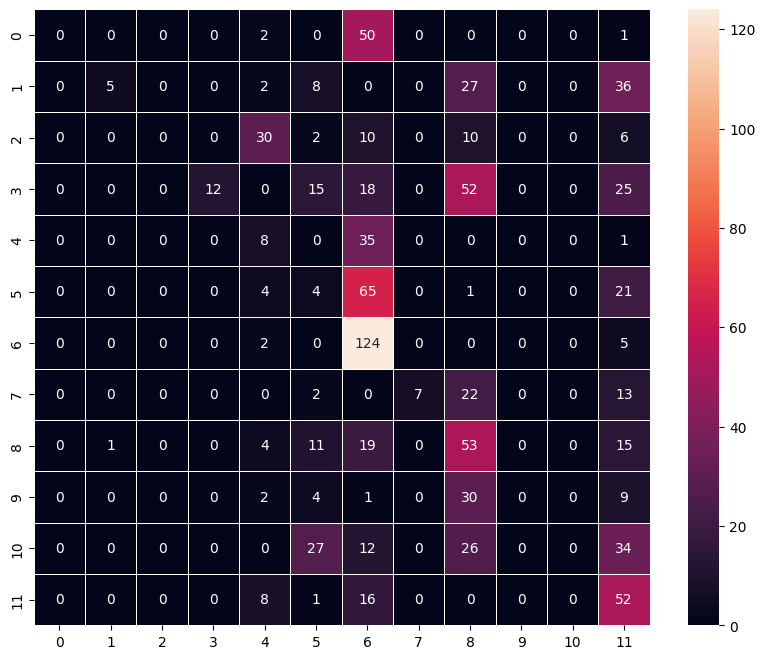

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred_2,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

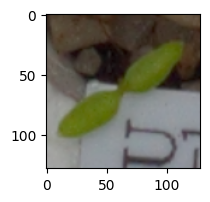

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted Label ['Scentless Mayweed']
True Label Common Chickweed


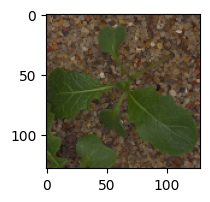

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label ['Sugar beet']
True Label Charlock


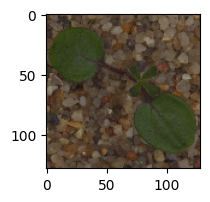

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label ['Sugar beet']
True Label Cleavers


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[36])

# Transfer Learning using VGG16

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight


In [ ]:
# Load VGG16 without the top layer and freeze its layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
# for layer in base_model.layers:
#     layer.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

# Assuming y_train_encoded contains integer labels for your classes
y_train_one_hot = to_categorical(y_train_encoded, num_classes=12)  # Confirm this is only done once

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Convert one-hot encoded labels to integers for class weight calculation
classes = np.argmax(y_train_one_hot, axis=1)

# Calculate class weights
# Convert classes to a 1D array
classes_1d = classes.flatten()
class_weights = compute_class_weight('balanced', classes=np.unique(classes_1d), y=classes_1d)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [ ]:
# Now, use these class weights in the fitting process
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Unfreeze the top layers of VGG16
for layer in base_model.layers[-6:]:
    layer.trainable = True

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.7)(x)
x = Dense(12, activation='softmax')(x)  # Final layer for 12 classes

In [ ]:
### Added for accuracy improvement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Create and compile the model
model_3 = Model(inputs=base_model.input, outputs=x)
model_3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Added nw

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_vgg16 = model_3.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=len(X_val) // 32,
    class_weight=class_weights_dict,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 35s 204ms/step - accuracy: 0.0913 - loss: 27.7095 - val_accuracy: 0.1282 - val_loss: 2.4736
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.0966 - loss: 25.8038 - val_accuracy: 0.1364 - val_loss: 2.1935
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.1880 - loss: 23.2244 - val_accuracy: 0.2953 - val_loss: 2.1559
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.2446 - loss: 21.5131 - val_accuracy: 0.4091 - val_loss: 2.0281
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.3249 - loss: 19.2234 - val_accuracy: 0.5043 - val_loss: 1.6983
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.3791 - loss: 18.1896 - val_accuracy: 0.6818 - val_loss: 1.8281
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.4747 - loss: 15.2371 - val_accuracy: 0.5927 - val_loss: 1.7036
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.5500 - loss: 12.5512 - val_ac

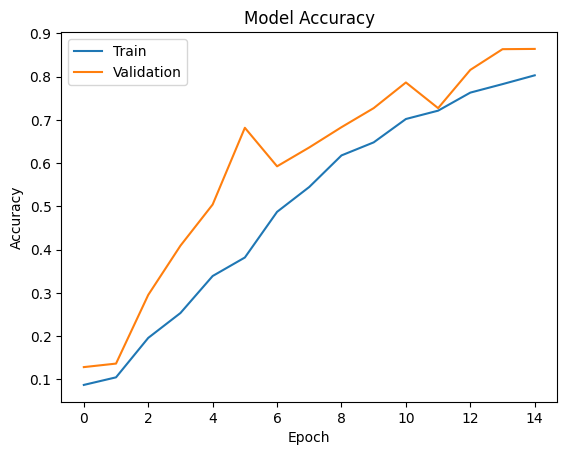

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_3.evaluate(X_test_normalized, y_test_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7684 - loss: 1.1115
Test Loss: 1.0715948343276978
Test Accuracy: 0.7747368216514587


In [ ]:
# Here we would get the output as probablities for each category
y_pred_3=model_3.predict(X_test_normalized) # Changed new_model to new_model_2

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


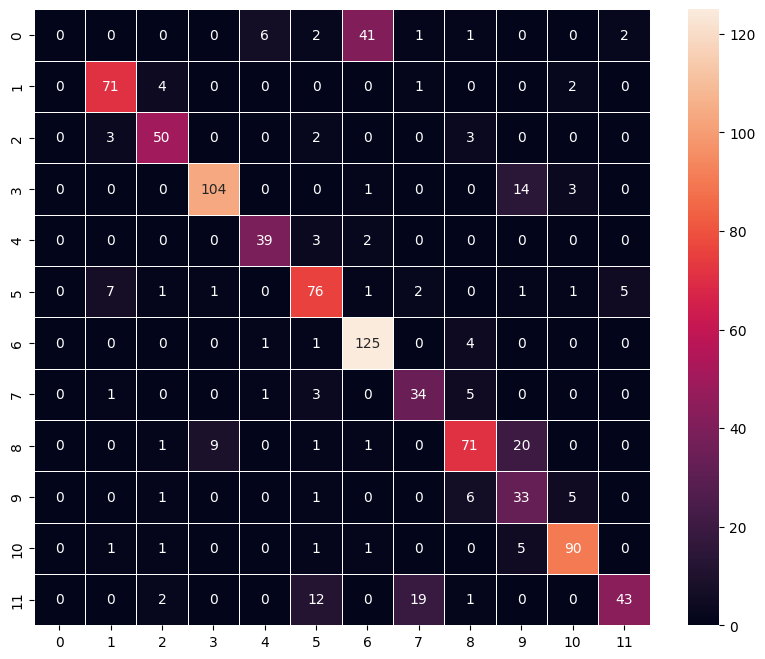

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred_3,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- High Correct Predictions: Classes like 1, 2, 3, 5, 6, 7, 8, and 10 have relatively high numbers on the diagonal, indicating that the model frequently predicts these classes correctly.

- Classes like 0, 4, and 9 have fewer correct predictions, which might be due to less representation in the training data or inherently more challenging features to learn.

## **Visualizing the prediction:**

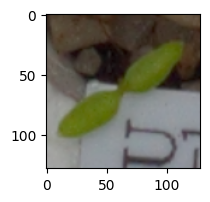

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


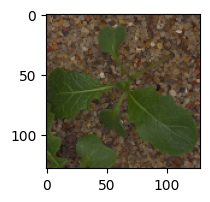

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label ['Charlock']
True Label Charlock


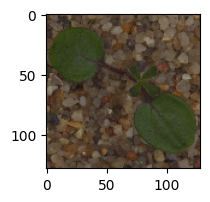

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Label ['Cleavers']
True Label Cleavers


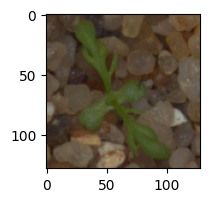

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


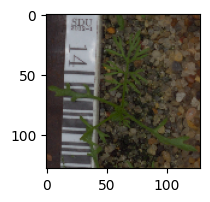

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


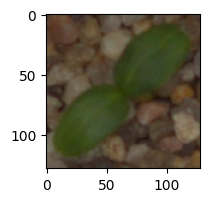

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label ['Cleavers']
True Label Cleavers


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[40])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_test_normalized[40].reshape(1,128,128,3)))))  # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[40])

plt.figure(figsize=(2,2))
plt.imshow(X_test[60])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_test_normalized[60].reshape(1,128,128,3)))))  # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[60])

plt.figure(figsize=(2,2))
plt.imshow(X_test[400])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_test_normalized[400].reshape(1,128,128,3)))))  # reshaping the input image to 128x128 as X_test_normalized has images of 128x128 size
print('True Label', enc.inverse_transform(y_test_encoded)[400])

## Conclusion
- We can observe from the confusion matrix of all the models that our VGG16 model was the best model because it predicted the majority/almost all of the classes better than the other models.
- The test accuracy of the VGG16 model is 63%.
- Data Augmentation has also helped in improving the model.
- Simply employing the transfer learning model can produce a better outcome than any ordinary CNN.

- These results suggest that the model is performing well in terms of recognizing and classifying the images according to the correct labels for the cases shown.
- The matching of predicted labels to the true labels in these instances suggests good generalization ability of the model on the test data. This is important for validating the effectiveness of the model in practical scenarios where it needs to classify new, unseen images.

## Summary and Comparisons

### Model1: Base CNN Model  
- Test Loss: 1.125083565711975
- Test Accuracy: 0.7684210538864136

### Model2: CNN Model with Data Augmentation
- Test Loss: 2.3678808212280273
- Test Accuracy: 0.2789473831653595

### Model3: Transfer Learning Model
- Test Loss: 1.0715948343276978
- Test Accuracy: 0.7747368216514587

***Model3 shows the best performance with the lowest loss and the highest accuracy. It is slightly better than Model 1, suggesting that whatever adjustments were made (whether in model complexity, training procedures, or data handling) might have effectively contributed to improved performance.***